<a href="https://colab.research.google.com/github/manuelzm0811/calidad_aire/blob/main/Codigocalidadaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#Se importa el archivo desde github
Df_Calidad_Aire = pd.read_csv("https://raw.githubusercontent.com/manuelzm0811/calidad_aire/refs/heads/main/Calidad_Del_Aire_En_Colombia_(Promedio_Anual)_20251203.csv")
display(Df_Calidad_Aire)
#Objetivo: Evaluar la problematica de la salud publica derivada de la contaminación  del aire en las ciudades colombianas, identificando zonas de mayor riesgo.



,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del máximo,Mínimo,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion
0,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,"2,011",256.8,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
1,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,"2,011",257.4,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
2,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,"2,011",4,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
3,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,"2,011",645.9,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
4,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,"2,011",645.9,...,20/10/2011 0:00,644,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,"31,876",SDA,MÓVIL FONTIBÓN,4.667694,-74.148861,PM10,ugm3,24,"2,023",53.5,...,31/08/2023 0:00,16.4,8/01/2023 0:00,45,11,"Bogotá, D.C.",11001.0,"Bogota, D.C.",Fija,POINT (-74.148861 4.667694)
28728,"31,876",SDA,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,1,"2,023",21.5,...,28/09/2023 21:00,0.4,2023-10-29 12:00:00 - 2023-11-04 20:00:00,215,11,"Bogotá, D.C.",11001.0,"Bogota, D.C.",Fija,POINT (-74.148861 4.667694)
28729,"31,876",SDA,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,24,"2,023",21.6,...,30/11/2023 0:00,3.8,29/10/2023 0:00,19,11,"Bogotá, D.C.",11001.0,"Bogota, D.C.",Fija,POINT (-74.148861 4.667694)
28730,"31,876",SDA,MÓVIL FONTIBÓN,4.667694,-74.148861,SO2,ugm3,1,"2,023",3.8,...,14/10/2023 8:00,0,2023-01-12 03:00:00 - 2023-01-12 06:00:00 - 20...,0,11,"Bogotá, D.C.",11001.0,"Bogota, D.C.",Fija,POINT (-74.148861 4.667694)


In [71]:
#Se formatea la columna Fechas en un Dataframe aparte para usarlo en un gráfico de lineas
Df_Calidad_Aire["Fechas/horas del máximo"] = pd.to_datetime(Df_Calidad_Aire["Fechas/horas del máximo"], errors="coerce")


In [52]:
#Se Eliminan columnas sin relevancia para el análisis del objetivo, además de renombrar algunas columnas para hacer más compacta la tabla.
Df_Calidad_Aire_limpio = Df_Calidad_Aire.drop(columns=["ID Estacion","Código del Departamento","Código del Municipio","Fechas/horas del máximo","Fechas/horas del mínimo","Ubicacion","Tipo de Estación","Autoridad Ambiental"])
Df_Calidad_Aire_limpio = Df_Calidad_Aire_limpio.rename(columns={"Nombre del Municipio":"Municipio","Nombre del Departamento":"Departamento"})
display(Df_Calidad_Aire_limpio)

,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,Porcentaje excedencias limite actual,Mediana,Percentil 98,Máximo,Mínimo,Días de excedencias,Departamento,Municipio
0,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,"2,011",256.8,"321,637.5091","1,411",16.0,0,0.00,244.2,350.8,359.5,1.3,0,ANTIOQUIA,GIRARDOTA
1,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,"2,011",257.4,"14,984.01",59,16.0,0,0.00,257.9,304.2,336.8,99.7,0,ANTIOQUIA,GIRARDOTA
2,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,"2,011",4,293.5,74,1.0,0,0.00,2.8,12.8,23,1.5,0,ANTIOQUIA,GIRARDOTA
3,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,"2,011",645.9,"2,917,013.928","4,516",52.0,0,0.00,646.1,648.1,649.8,641.6,0,ANTIOQUIA,GIRARDOTA
4,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,"2,011",645.9,"121,434.69",188,52.0,0,0.00,645.9,647.2,647.9,644,0,ANTIOQUIA,GIRARDOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,MÓVIL FONTIBÓN,4.667694,-74.148861,PM10,ugm3,24,"2,023",53.5,"17,484.66",327,90.0,45,13.76,53.1,90.9,101.5,16.4,45,"Bogotá, D.C.","Bogota, D.C."
28728,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,1,"2,023",21.5,"164,994.3","7,660",87.0,978,12.77,18.9,57.4,106.8,0.4,215,"Bogotá, D.C.","Bogota, D.C."
28729,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,24,"2,023",21.6,"6,918.81",321,88.0,19,5.92,20.9,41.2,50.1,3.8,19,"Bogotá, D.C.","Bogota, D.C."
28730,MÓVIL FONTIBÓN,4.667694,-74.148861,SO2,ugm3,1,"2,023",3.8,"29,827.29","7,801",89.0,0,0.00,2.4,19.3,84.6,0,0,"Bogotá, D.C.","Bogota, D.C."


In [ ]:
print("---------------------------------------------------------------------------------------------------------------------------------")
#Se hace depuración de la información Eliminando variables meteorológicas y dejamos sólo las contaminantes que son las prescindibles para el análisis.
Df_Calidad_Aire_limpio_contaminante = Df_Calidad_Aire_limpio[~Df_Calidad_Aire_limpio["Variable"].isin(["DViento","PLiquida", "TAire2", "TAire10", "HAire", "HAire2", "HAire10", "VViento", "RGlobal", "P", "RUVb","TAire"])]
mayor_contaminante= Df_Calidad_Aire_limpio_contaminante.value_counts("Variable")
display(mayor_contaminante)



In [ ]:
print("---------------------------------------------------------------------------------------------------------------------------------")
#Se hace el conteo de las mediciones hechas, dividiendolas por cantidad de divisón hechas en cada municipio
Mediciones_Por_Municipio = Df_Calidad_Aire_limpio.value_counts("Municipio")
display(Mediciones_Por_Municipio)




In [ ]:
print("---------------------------------------------------------------------------------------------------------------------------------")
#Se hace el conteo de estaciones por municipio
Estacion_Por_Municipio = Df_Calidad_Aire_limpio_contaminante.value_counts("Estación")
display(Estacion_Por_Municipio)


In [29]:
print("---------------------------------------------------------------------------------------------------------------------------------")
#Se elige un número arbitrario que en este caso es 3 para hacer una lista de municipios con mayor número de días con excedencias y compactar la tabla para que sea más legible, además se eliminan los municipios duplicados en el resulado.
mayores_3 = Df_Calidad_Aire_limpio_contaminante.groupby("Municipio")["Días de excedencias"].max().sort_values(ascending=False)
mayores_3_Df = mayores_3.reset_index()
mayores_3_Df.drop_duplicates(subset="Municipio", inplace=True)
display("Los 3 Municipios con más días de excedencias anuales son: ",mayores_3_Df.head(3))

---------------------------------------------------------------------------------------------------------------------------------


'Los 3 Municipios con más días de excedencias anuales son: '

,Municipio,Días de excedencias
0,ITAGUI,327
1,"BOGOTÁ, D.C.",323
2,JAMUNDI,310


In [22]:
print("---------------------------------------------------------------------------------------------------------------------------------")
display(Df_Calidad_Aire_limpio_contaminante)

---------------------------------------------------------------------------------------------------------------------------------


,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,Suma,No. de datos,Representatividad Temporal,Excedencias limite actual,Porcentaje excedencias limite actual,Mediana,Percentil 98,Máximo,Mínimo,Días de excedencias,Departamento,Municipio
5,I.E. COL. COLOMBIA,6.378517,-75.443986,PST,ugm3,24,"2,011",72,"6,353.05",84,69.0,0,0.00,73.4,124.8,155.7,21.1,0,ANTIOQUIA,GIRARDOTA
11,ITA-COL. EL ROSARIO,6.174472,-75.610278,PST,ugm3,24,"2,011",87,"7,582.23",83,68.0,0,0.00,87,156.7,176.7,25.1,0,ANTIOQUIA,ITAGÜÍ
20,NORMAL,7.126100,-73.120000,PM2.5,ugm3,24,"2,018",12.1,"1,110.93",92,25.0,0,0.00,10.4,22.1,23.1,4.8,0,SANTANDER,BUCARAMANGA
34,COGUA-PTAR I,5.054945,-73.976986,PST,ugm3,24,"2,011",83,"12,013.73",143,79.0,0,0.00,82.6,113.9,118.8,46.5,0,CUNDINAMARCA,COGUA
35,EMAFEZ,5.010013,-74.002743,PST,ugm3,24,"2,011",91.5,"13,138.94",142,78.0,0,0.00,94.2,117.4,127.1,59.1,0,CUNDINAMARCA,ZIPAQUIRÁ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,MÓVIL FONTIBÓN,4.667694,-74.148861,PM10,ugm3,24,"2,023",53.5,"17,484.66",327,90.0,45,13.76,53.1,90.9,101.5,16.4,45,"Bogotá, D.C.","Bogota, D.C."
28728,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,1,"2,023",21.5,"164,994.3","7,660",87.0,978,12.77,18.9,57.4,106.8,0.4,215,"Bogotá, D.C.","Bogota, D.C."
28729,MÓVIL FONTIBÓN,4.667694,-74.148861,PM2.5,ugm3,24,"2,023",21.6,"6,918.81",321,88.0,19,5.92,20.9,41.2,50.1,3.8,19,"Bogotá, D.C.","Bogota, D.C."
28730,MÓVIL FONTIBÓN,4.667694,-74.148861,SO2,ugm3,1,"2,023",3.8,"29,827.29","7,801",89.0,0,0.00,2.4,19.3,84.6,0,0,"Bogotá, D.C.","Bogota, D.C."


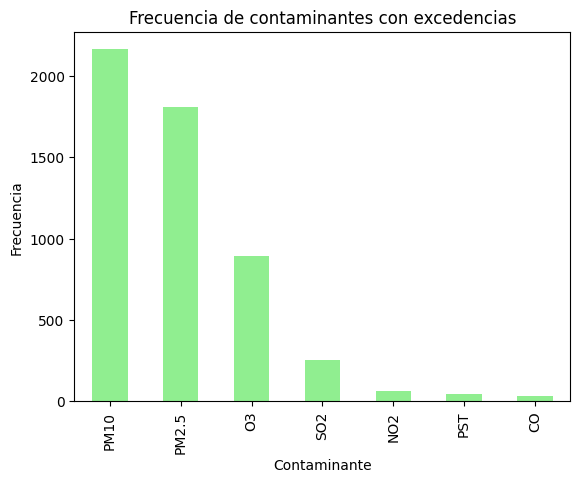

In [50]:
#Digrama de barras por contaminante y frecuencia, donde contaminante es el contaminante medido y la frecuencia es la cantidad de veces que este contaminante medido sobrepaso los días de excedencia

contaminante_filtrado = Df_Calidad_Aire_limpio_contaminante[Df_Calidad_Aire_limpio_contaminante["Días de excedencias"] > 0]
contaminante_grafico = contaminante_filtrado["Variable"].value_counts()

contaminante_grafico.plot(kind="bar", color="#90EE90", title="Frecuencia de contaminantes con excedencias")
plt.xlabel("Contaminante")
plt.ylabel("Frecuencia")
plt.show()


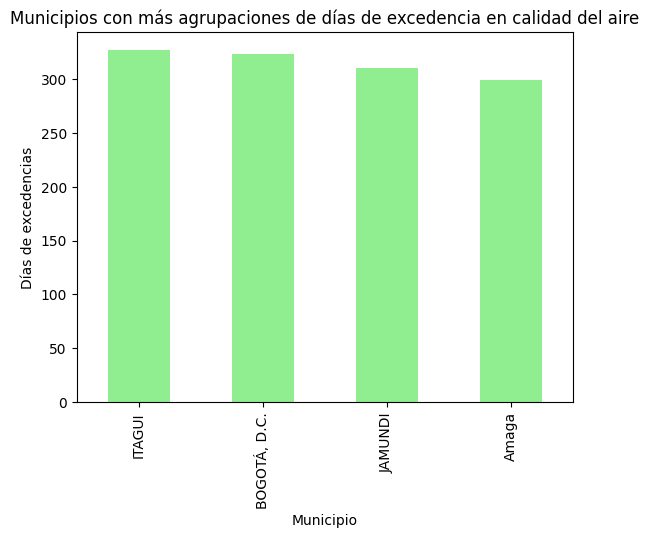

In [49]:
#Gráfico de barras con la medición más actual 2024 de días de excedencias en las ciudades con mayor contaminación


mayores = mayores_3_Df.groupby("Municipio")["Días de excedencias"].max().sort_values(ascending=False)

mayores.head(4).plot(kind="bar", color="#90EE90",title="Municipios con más agrupaciones de días de excedencia en calidad del aire")
plt.ylabel("Días de excedencias")
plt.show()


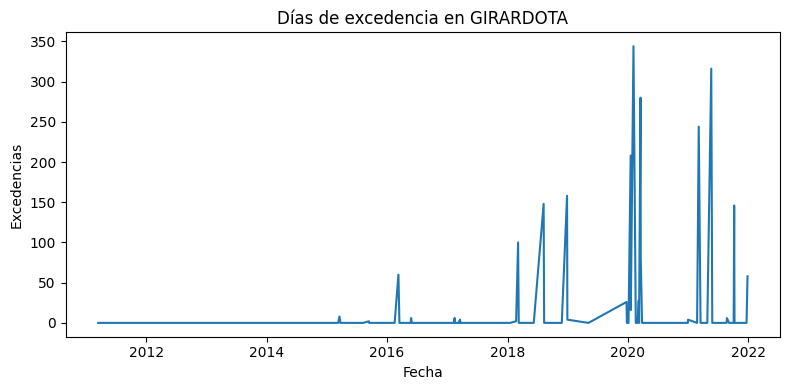

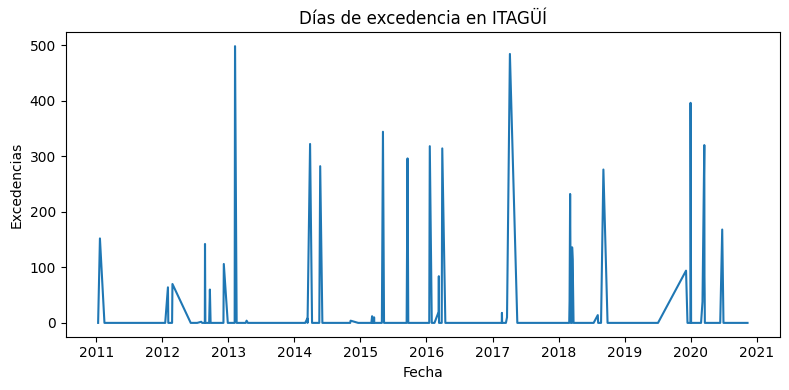

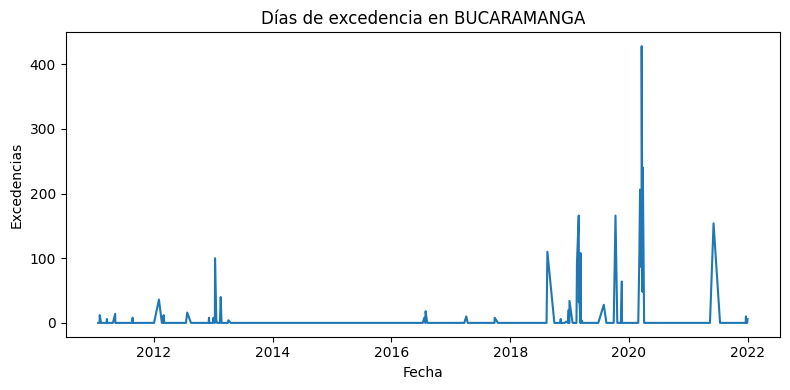

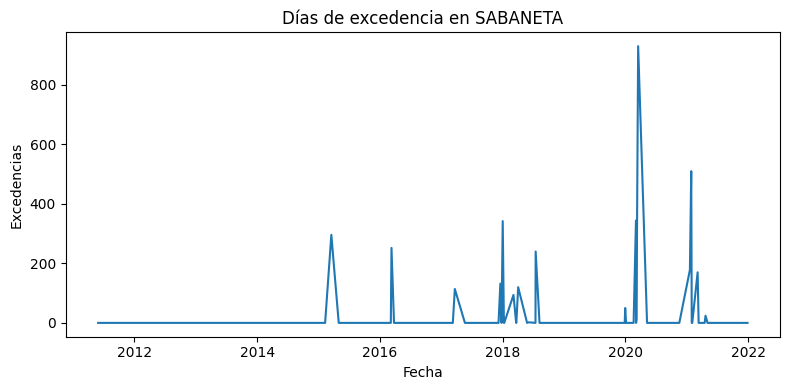

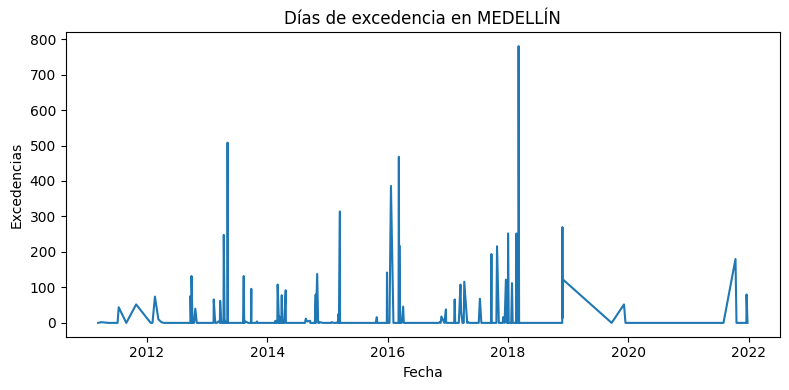

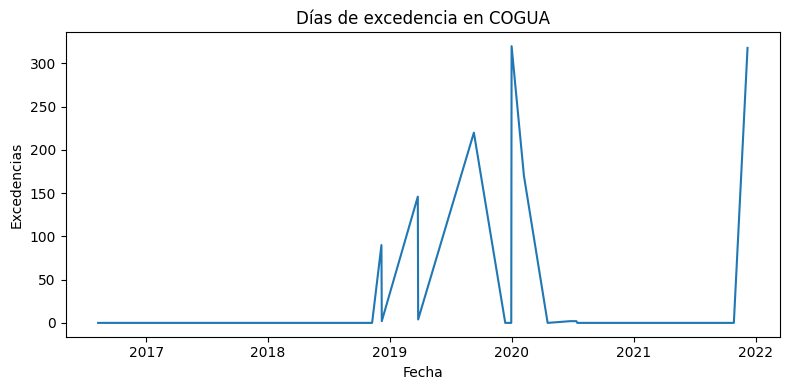

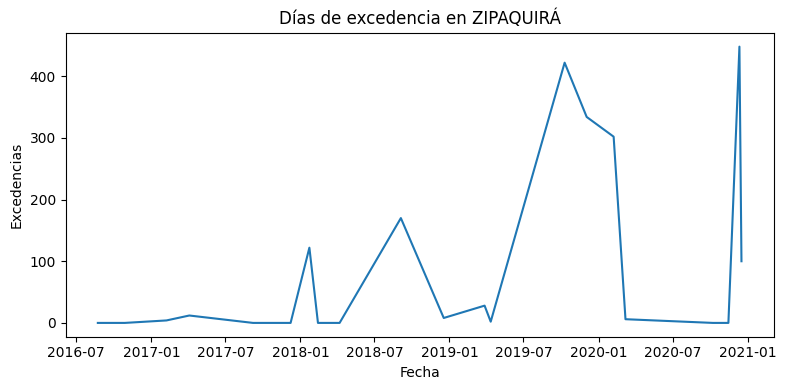

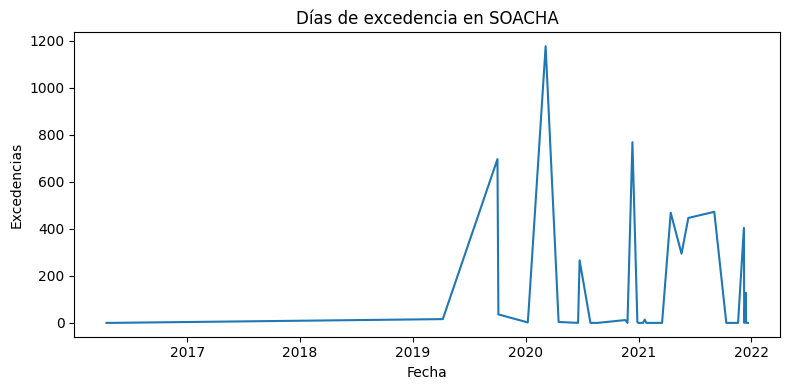

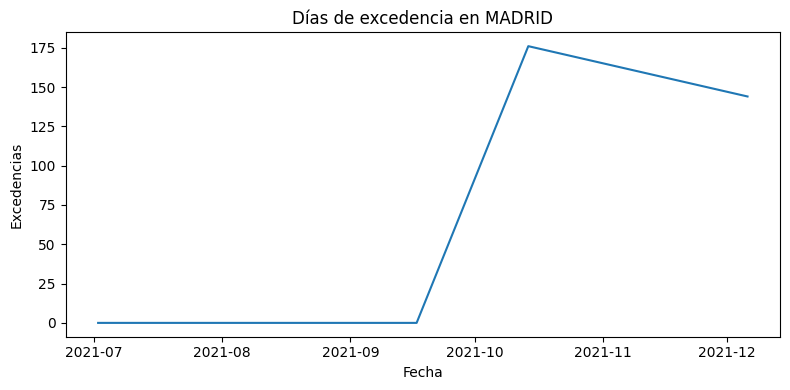

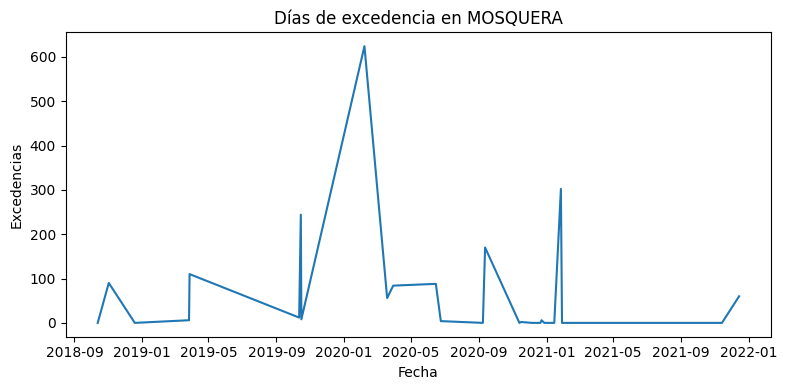

In [70]:


municipios = Df_Calidad_Aire["Nombre del Municipio"].dropna().unique()

for municipio in municipios[:10]:
    data = Df_Calidad_Aire[Df_Calidad_Aire["Nombre del Municipio"] == municipio]

    serie = data.groupby(
        data["Fechas/horas del máximo"].dt.date
    )["Días de excedencias"].sum()

    plt.figure(figsize=(8,4))
    plt.plot(serie)
    plt.title(f"Días de excedencia en {municipio}")
    plt.xlabel("Fecha")
    plt.ylabel("Excedencias")
    plt.tight_layout()
    plt.show()


In [ ]:
#Se hace el trabajo con una base datos actual, que lleva el registro desde el 2011 hasta el 2024, no se usa el de 2025 porque aún no termina el año y por ende no se entrega la medición.  No se encontraron valores nulos